# 손실함수

## 오차제곱합

In [15]:
import numpy as np

In [16]:
def sum_squares_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [17]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [18]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [19]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

## 교차 엔트로피 오차

In [14]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [20]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [21]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [22]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 미니배치 학습

In [23]:
from dataset.mnist import load_mnist

In [79]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [80]:
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [81]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
batch_mask

array([35442,  3850, 56691, 46073, 28692, 28031, 49516, 17180, 48474,
       57193])

In [82]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [83]:
t_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## (배치용) 교차 엔트로피 오차 구현

In [84]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = t.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

# 수치 미분

## 미분

In [86]:
np.float32(1e-50)

0.0

In [87]:
np.float64(1e-50)

1e-50

In [88]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

## 수치 미분의 예

In [92]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [93]:
import numpy as np
import matplotlib.pyplot as plt

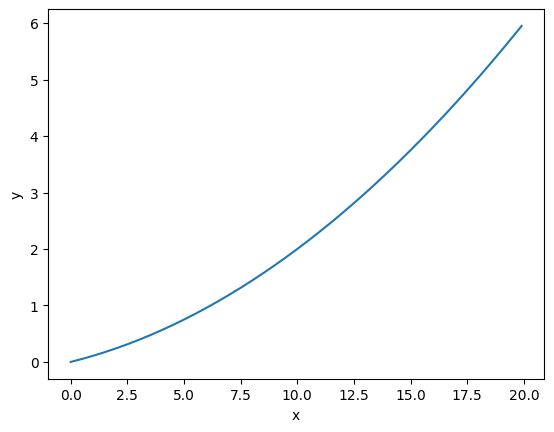

In [94]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [96]:
numerical_diff(function_1, 5)

0.1999999999990898

In [97]:
numerical_diff(function_1, 10)

0.2999999999986347

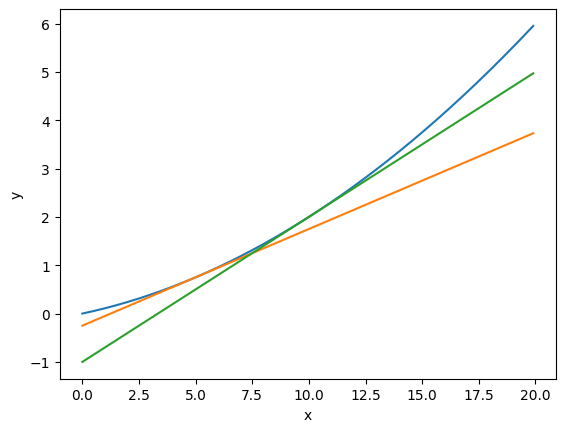

In [102]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
y2 = (x-5)*numerical_diff(function_1, 5) + function_1(5)
y3 = (x-10)*numerical_diff(function_1, 10) + function_1(10)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 편미분

In [104]:
def fuction_2(x):
    return x[0]**2 + x[1]**2

# 기울기

In [105]:
fuction_2(np.array([3.0, 4.0]))

25.0

In [124]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
#     print(x)
#     print(x.size)
#     print(x.shape)
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원
#         print(grad[idx])

    return grad


# f(x0, x1) = x0² + x1²
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

In [125]:
fuction_2(np.array([3.0, 4.0]))

25.0

In [126]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 경사 하강법

In [127]:
def gradient_decent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    
    return x

In [128]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [132]:
init_x = np.array([-3.0, 4.0])

gradient_decent(function_2, init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [133]:
init_x = np.array([-3.0, 4.0])

gradient_decent(function_2, init_x, lr=10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [134]:
init_x = np.array([-3.0, 4.0])

gradient_decent(function_2, init_x, lr=1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

## 신경망에서의 기울기

In [3]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [4]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [5]:
net = simpleNet()
net.W

array([[0.43896287, 1.02298116, 1.66082118],
       [0.33968352, 0.22723887, 0.66006799]])

In [6]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([0.56909289, 0.81830367, 1.5905539 ])

In [8]:
np.argmax(p)

2

In [12]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.599957217785252

In [144]:
def f(W):
    return net.loss(x, t)

In [146]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.34832285,  0.06625923, -0.41458208],
       [ 0.52248428,  0.09938885, -0.62187312]])

# 학습 알고리즘 구현하기

## 2층 신경망 클래스 구현하기

In [147]:
from common.functions import *
from common.gradient import numerical_gradient

In [178]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2        
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])        
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])                
        
        return grads
    

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num  # ????
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads    

In [179]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape, net.params['b1'].shape, net.params['W2'].shape, net.params['b2'].shape

((784, 100), (100,), (100, 10), (10,))

In [180]:
x = np.random.rand(100, 784)
y = net.predict(x)
y.shape

(100, 10)

In [181]:
x = np.random.rand(1, 784)
t = np.random.rand(1, 10)

# grads = net.numerical_gradient(x, t)
grads = net.gradient(x, t)

In [182]:
grads['W1'].shape, grads['b1'].shape, grads['W2'].shape, grads['b2'].shape

((784, 100), (100,), (100, 10), (10,))

## 미니배치 학습 구현하기

In [183]:
import numpy as np
from dataset.mnist import load_mnist
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [184]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [185]:
for _ in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

100%|████████████████████████████████████| 10000/10000 [00:25<00:00, 393.42it/s]


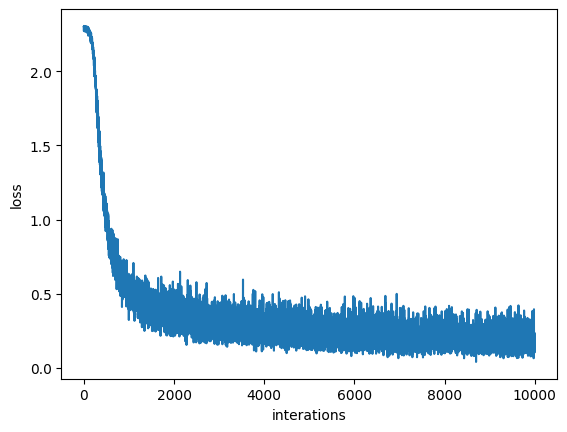

In [188]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)
plt.xlabel('interations')
plt.ylabel('loss')
plt.show()

## 시험 데이터로 평가하기

In [193]:
import numpy as np
from dataset.mnist import load_mnist
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
test_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size/batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        test_loss = network.loss(x_batch, t_batch)
        test_loss_list.append(test_loss)        
#         print(f'train acc : {train_acc}, test acc : {test_acc}')

100%|████████████████████████████████████| 10000/10000 [00:33<00:00, 301.57it/s]


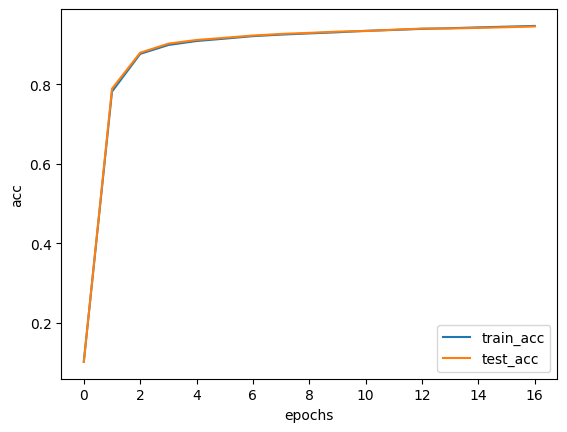

In [195]:
import matplotlib.pyplot as plt

plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

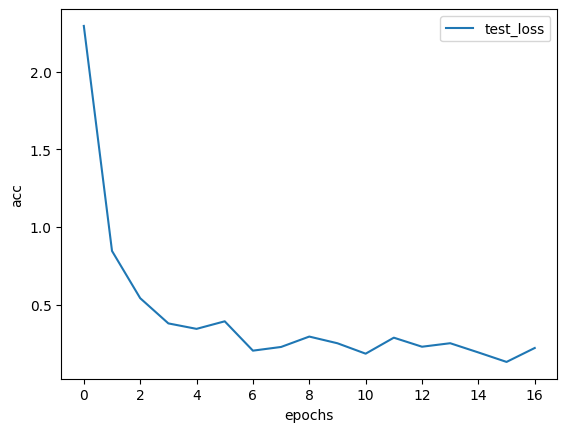

In [194]:
import matplotlib.pyplot as plt

plt.plot(test_loss_list, label='test_loss')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()